In [89]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [90]:
df=pd.read_csv('Amazon Sale Report.csv' , encoding='ISO-8859-1')

In [91]:
df.shape

(128976, 21)

In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128976 entries, 0 to 128975
Data columns (total 21 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   index               128976 non-null  int64  
 1   Order ID            128976 non-null  object 
 2   Date                128976 non-null  object 
 3   Status              128976 non-null  object 
 4   Fulfilment          128976 non-null  object 
 5   Sales Channel       128976 non-null  object 
 6   ship-service-level  128976 non-null  object 
 7   Category            128976 non-null  object 
 8   Size                128976 non-null  object 
 9   Courier Status      128976 non-null  object 
 10  Qty                 128976 non-null  int64  
 11  currency            121176 non-null  object 
 12  Amount              121176 non-null  float64
 13  ship-city           128941 non-null  object 
 14  ship-state          128941 non-null  object 
 15  ship-postal-code    128941 non-nul

In [93]:
df.drop(columns=['index'],inplace=True)

In [94]:
df.isnull().sum()

Order ID                   0
Date                       0
Status                     0
Fulfilment                 0
Sales Channel              0
ship-service-level         0
Category                   0
Size                       0
Courier Status             0
Qty                        0
currency                7800
Amount                  7800
ship-city                 35
ship-state                35
ship-postal-code          35
ship-country              35
B2B                        0
fulfilled-by           89713
New                   128976
PendingS              128976
dtype: int64

# Fill 'currency' with the most frequent value

In [95]:
df['currency'].fillna(df['currency'].mode()[0], inplace=True)

# Fill 'Amount' with the mean value

In [96]:
df['Amount'].fillna(df['Amount'].mean(), inplace=True)

# Fill 'ship-city', 'ship-state', 'ship-country' with 'Unknown'
# and 'ship-postal-code' with 0

In [97]:
df['ship-city'].fillna('Unknown', inplace=True)
df['ship-state'].fillna('Unknown', inplace=True)
df['ship-postal-code'].fillna(0, inplace=True)
df['ship-country'].fillna('Unknown', inplace=True)

# Fill 'fulfilled-by' with 'Unknown'

In [98]:
df['fulfilled-by'].fillna('Unknown', inplace=True)

In [99]:
df.drop(columns=['New','PendingS'],inplace=True)

In [100]:
df.isnull().sum()

Order ID              0
Date                  0
Status                0
Fulfilment            0
Sales Channel         0
ship-service-level    0
Category              0
Size                  0
Courier Status        0
Qty                   0
currency              0
Amount                0
ship-city             0
ship-state            0
ship-postal-code      0
ship-country          0
B2B                   0
fulfilled-by          0
dtype: int64

#Exploratory Data Analysis(EDA)

#Status Analysis

In [101]:
df['Status'].value_counts()

Status
Shipped                          77815
Shipped - Delivered to Buyer     28756
Cancelled                        18334
Shipped - Returned to Seller      1954
Shipped - Picked Up                973
Pending                            658
Pending - Waiting for Pick Up      281
Shipped - Returning to Seller      145
Shipped - Out for Delivery          35
Shipped - Rejected by Buyer         11
Shipping                             8
Shipped - Lost in Transit            5
Shipped - Damaged                    1
Name: count, dtype: int64

In [102]:
status_counts = {
    "Shipped": 77815,
    "Shipped - Delivered to Buyer": 28756,
    "Cancelled": 18334,
    "Shipped - Returned to Seller": 1954,
    "Shipped - Picked Up": 973,
    "Pending": 658,
    "Pending - Waiting for Pick Up": 281,
    "Shipped - Returning to Seller": 145,
    "Shipped - Out for Delivery": 35,
    "Shipped - Rejected by Buyer": 11,
    "Shipping": 8,
    "Shipped - Lost in Transit": 5,
    "Shipped - Damaged": 1
}

In [103]:
labels = status_counts.keys()
sizes = status_counts.values()

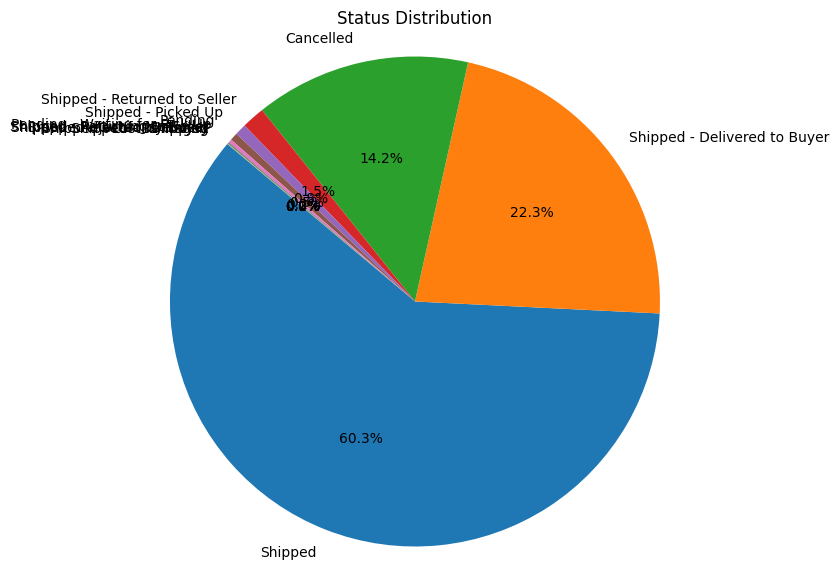

In [104]:
plt.figure(figsize=(10,7))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Status Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

#Fulfilment Analysis

In [105]:
df['Fulfilment'].value_counts()

Fulfilment
Amazon      89713
Merchant    39263
Name: count, dtype: int64

In [106]:
fulfilment_counts = {
    "Amazon": 89713,
    "Merchant": 39263
}

In [107]:
labels = fulfilment_counts.keys()
sizes = fulfilment_counts.values()

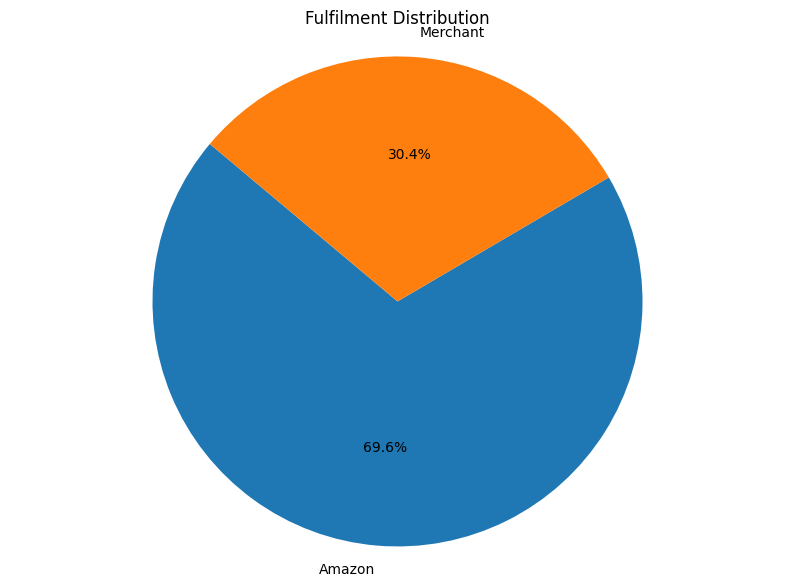

In [108]:
plt.figure(figsize=(10,7))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Fulfilment Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

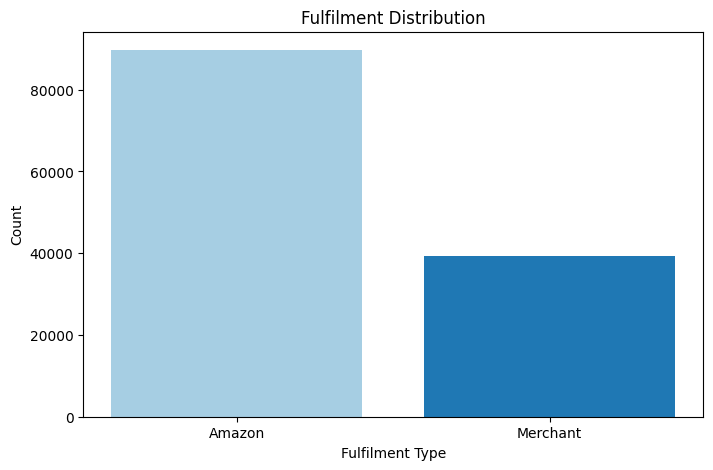

In [109]:
# Plotting the bar chart
labels = list(fulfilment_counts.keys())
sizes = list(fulfilment_counts.values())

plt.figure(figsize=(8,5))
plt.bar(labels, sizes, color=plt.cm.Paired(range(len(labels))))
plt.xlabel('Fulfilment Type')
plt.ylabel('Count')
plt.title('Fulfilment Distribution')
plt.show()

#Sales Channel Analysis

In [110]:
df['Sales Channel'].value_counts()

Sales Channel
Amazon.in     128852
Non-Amazon       124
Name: count, dtype: int64

In [111]:
sales_channel_count={
    'Amazon.in':128852,
    'Non-Amazon':124
}

labels = sales_channel_count.keys()
sizes = sales_channel_count.values()

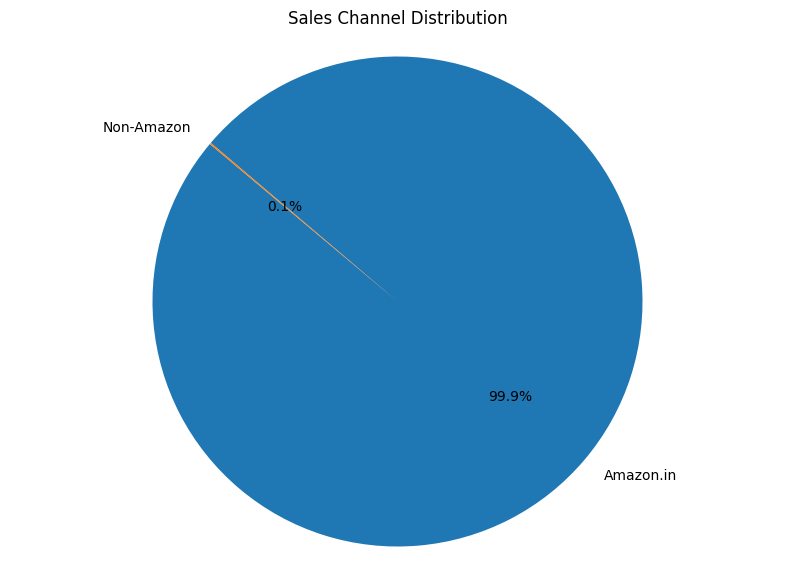

In [112]:
plt.figure(figsize=(10,7))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Sales Channel Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

#Ship service level Analysis

In [113]:
df['ship-service-level'].value_counts()

ship-service-level
Expedited    88630
Standard     40346
Name: count, dtype: int64

In [114]:
ship_service_level_count={
    'Expedited':88630,
    'Standard':40346
}

labels = ship_service_level_count.keys()
sizes = ship_service_level_count.values()

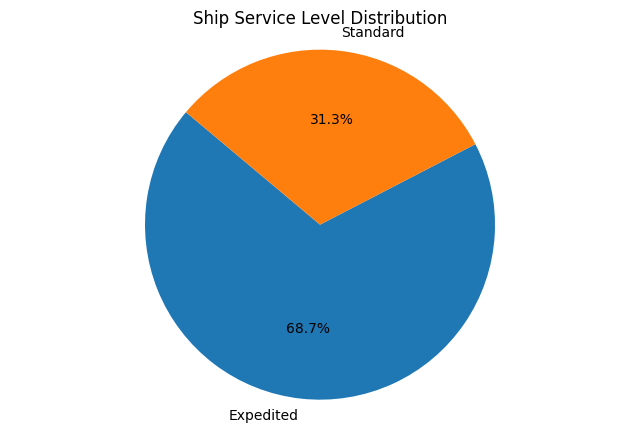

In [115]:
plt.figure(figsize=(8,5))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Ship Service Level Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

#Category Analysis

In [116]:
df['Category'].value_counts()

Category
T-shirt     50292
Shirt       49877
Blazzer     15500
Trousers    10616
Perfume      1157
Wallet        926
Socks         440
Shoes         165
Watch           3
Name: count, dtype: int64

In [117]:
# Data
category_counts = {
    "T-shirt": 50292,
    "Shirt": 49877,
    "Blazzer": 15500,
    "Trousers": 10616,
    "Perfume": 1157,
    "Wallet": 926,
    "Socks": 440,
    "Shoes": 165,
    "Watch": 3
}


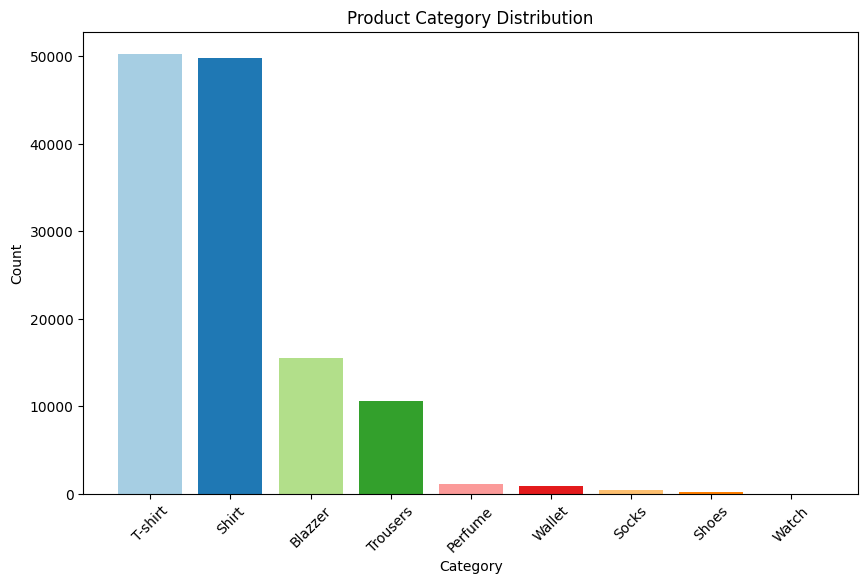

In [118]:
# Plotting the bar chart
labels = list(category_counts.keys())
sizes = list(category_counts.values())

plt.figure(figsize=(10, 6))
plt.bar(labels, sizes, color=plt.cm.Paired(range(len(labels))))
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Product Category Distribution')
plt.xticks(rotation=45)
plt.show()

#Courier Status Analysis

In [119]:
df['Courier Status'].value_counts()

Courier Status
Shipped       109486
On the Way      6870
Unshipped       6680
Cancelled       5940
Name: count, dtype: int64

In [120]:
data = {
    'Shipped': 109486,
    'On the Way': 6870,
    'Unshipped': 6680,
    'Cancelled': 5940
}

labels = data.keys()
sizes = data.values()

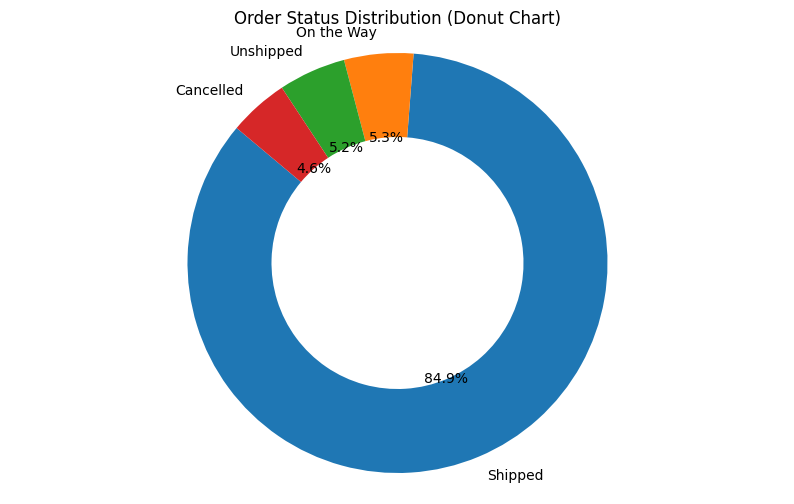

In [121]:
# Plotting donut chart
plt.figure(figsize=(10,6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, wedgeprops=dict(width=0.4))
plt.title('Order Status Distribution (Donut Chart)')
plt.axis('equal')
plt.show()

#Quantity Analysis

In [122]:
df['Qty'].value_counts()

Qty
1     115779
0      12810
2        340
3         32
4          9
5          2
15         1
9          1
13         1
8          1
Name: count, dtype: int64

In [123]:
data = {
    "1": 115779,
    "0": 12810,
    "2": 340,
    "3": 32,
    "4": 9,
    "5": 2,
    "15": 1,
    "9": 1,
    "13": 1,
    "8": 1
}

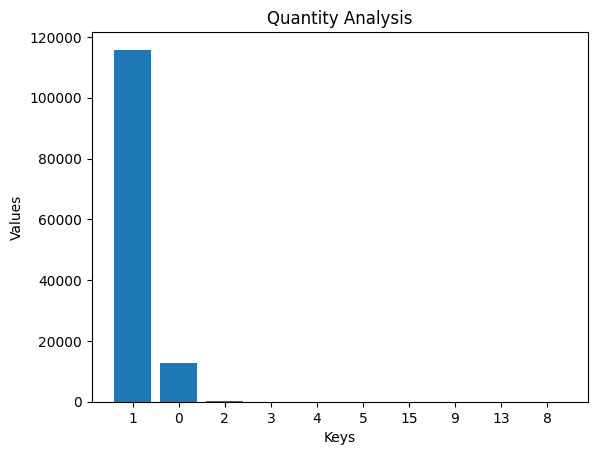

In [124]:
# Plotting the bar chart
plt.bar(data.keys(), data.values())
plt.xlabel('Keys')
plt.ylabel('Values')
plt.title('Quantity Analysis')
plt.show()

#Currency Analysis

In [125]:
df['currency'].value_counts()

currency
INR    128976
Name: count, dtype: int64

#Ship State Analysis   

In [126]:
df['ship-state'].value_counts()

ship-state
MAHARASHTRA               22272
KARNATAKA                 17324
TAMIL NADU                11488
TELANGANA                 11330
UTTAR PRADESH             10646
                          ...  
APO                           1
PB                            1
orissa                        1
Punjab/Mohali/Zirakpur        1
Pondicherry                   1
Name: count, Length: 70, dtype: int64

In [127]:
# Define the data
data = {
    "State": [
        "MAHARASHTRA", "KARNATAKA", "TAMIL NADU", "TELANGANA",
        "UTTAR PRADESH", "APO", "PB", "orissa",
        "Punjab/Mohali/Zirakpur", "Pondicherry"
    ],
    "Count": [
        22272, 17324, 11488, 11330, 10646, 1, 1, 1, 1, 1
    ]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Save the DataFrame to a CSV file
df.to_csv('state_counts.csv', index=False)


<ipython-input-128-9b597e7e8bae>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='State', data=data, palette='viridis')


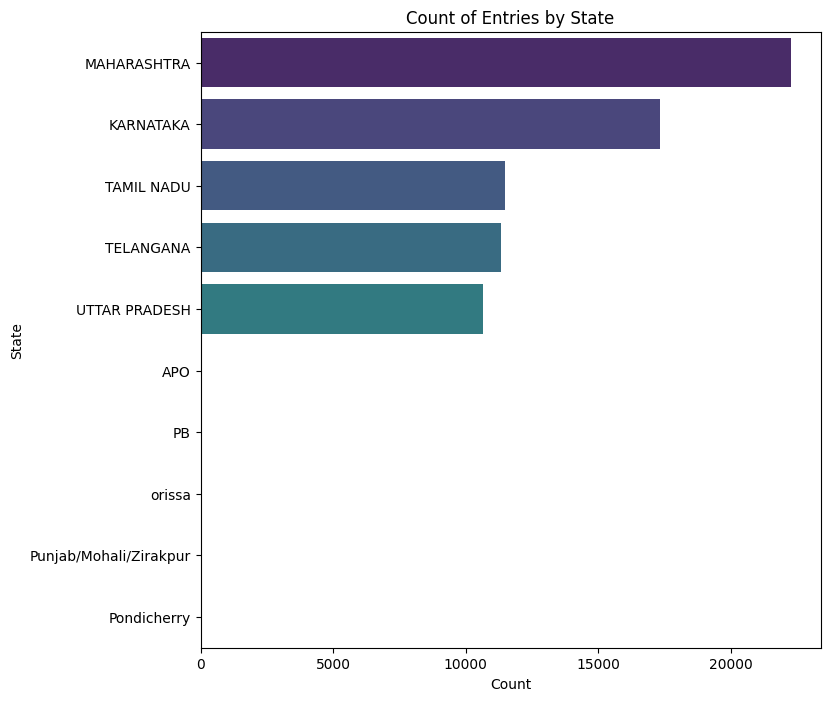

In [128]:
data = pd.read_csv('state_counts.csv')

# Create the count plot
plt.figure(figsize=(8,8))
sns.barplot(x='Count', y='State', data=data, palette='viridis')

# Add title and labels
plt.title('Count of Entries by State')
plt.xlabel('Count')
plt.ylabel('State')

# Show the plot
plt.show()